![seaborn](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/07/seaborn.png) 
# The good, the bad, the seaborn


#### Whats wrong with this data visualization? (hint: so many things)

<img src="https://pbs.twimg.com/media/DNTFhGaXcAEbrMO.jpg" width=800>

Learning goals:
- Create a list of best practices for data visualization
- Identify the differences between matplotlib and seaborn
- Create a visualization with seaborn, applying best practices

## Goal 1: Create a list of best practices for data visualization

Documenting best practices:

In groups:
- Group 1: [article 1](https://www.jackhagley.com/What-s-the-difference-between-an-Infographic-and-a-Data-Visualisation)
- Group 2: [article 2](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march)
- Group 3: [article 3](http://dataremixed.com/2016/04/the-design-of-everyday-visualizations/)
- Group 4: [article 4](https://visme.co/blog/data-storytelling-tips/)
- Group 5: [article 5](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)
- Group 6: [article 6](files/VisualizationsThatReallyWork.pdf)

To fill in: [Best practices deck](https://docs.google.com/presentation/d/1EmHXyT_zkuPxFfMTBMjrryXkbmgWNbDq1tgvB0EKI04/edit?usp=sharing) 

## Goal 2:  Identify differences between seaborn & matplotlib


### Two code examples to accomplish the same plot:

**Resources:**
- [python graph gallery on seaborn](https://python-graph-gallery.com/seaborn/)
- [seaborn](https://seaborn.pydata.org/)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #from show: West wing
%matplotlib inline

# Load in data
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")


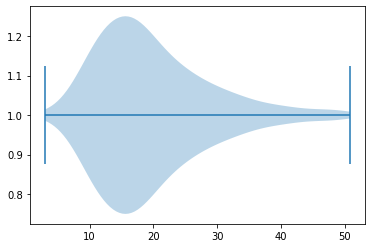

In [2]:
# Matplotlib:

# Initialize Figure:dimension of plot and Axes: number of plots object
fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(tips["total_bill"], vert=False) # it is smoothed based on kernel

# Show the plot
plt.show()

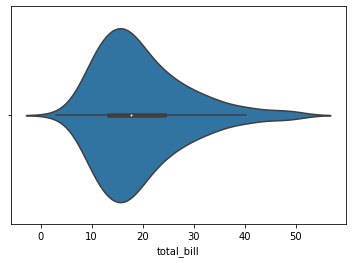

In [4]:
# Seaborn:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tips = sns.load_dataset("tips")
#tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv") #same

# Create violinplot

sns.violinplot(x = "total_bill", data=tips)

# Show the plot
plt.show()

### In depth comparison:

#### Groups 1:3

For each plot:
- How is the code to create it different from the maplotlib code?
- What are the customization options? 
- What are the top 3 most important customization options to know(with code) ?

Group 1 - [histograms](https://python-graph-gallery.com/histogram/)<br>
Group 2 - [scatter plot](https://python-graph-gallery.com/scatter-plot/)<br>
Group 3 - [boxplot](http://python-graph-gallery.com/boxplot/)<br>

#### Groups 4:5
- What new vocabulary was introduced in these posts?
- What is the benefit of these new options?
- What code/options do you need to know? 

Group 4 - [diverging, sequential, discrete color palattes](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/)<br>
Group 5 - [seaborn themes](https://python-graph-gallery.com/104-seaborn-themes/) <br>

_Time to work:_ 10 minutes <br>
_Time to discuss as large group:_ 10 minutes

#### Group 6
[seaborn themes w matplotlib](https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/) How does this work?

## Goal 3: Create a visualization with seaborn, applying best practices

[exercise from data world](https://data.world/makeovermonday/2018w37-paying-the-president)


In [5]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/5qxp2ldwsel3ow2pq5mkvfas2rfaup') #default is the first sheet


In [6]:
df.head()

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state
0,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2016",9000.00,Rent,Trump Plaza LLC,RENT,TRUMP PLAZA LLC,New York,NY
1,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2016",6000.00,Rent,Trump CPS LLC,RENT,TRUMP CPS LLC,New York,NY
2,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2017",39816.67,Rent,Trump Tower Commercial LLC,RENT,TRUMP TOWER COMMERCIAL LLC,Hicksville,NY
3,FEC,"Donald J. Trump for President, Inc.","Apr 1, 2017",1000.00,Rent,Trump Restaurants LLC,RENT,TRUMP RESTAURANTS LLC,New York,NY
4,government,Department of Defense,"Apr 10, 2017",1422.00,Lodging,Trump Hotel Panama,Hotels-Lodging,Trump International Hotel & Tower Panama,Panama City,Panama


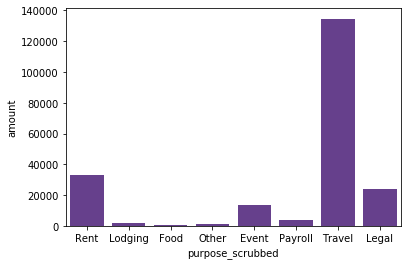

In [9]:
sns.barplot(x = "purpose_scrubbed", y = "amount", data = df, ci = None, color = "rebeccapurple") 
#ci: confidence interval(not really. only upper side)

In [13]:
df_wo_travel = df.loc[df.purpose_scrubbed != "Travel"]

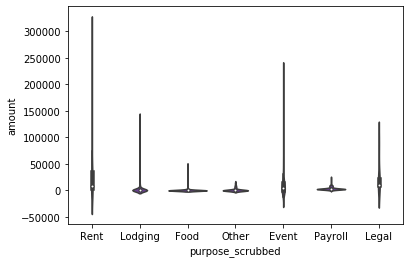

In [15]:
sns.violinplot(x = "purpose_scrubbed", y = "amount", data = df_wo_travel, color = "rebeccapurple") 

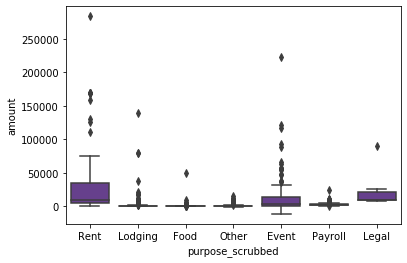

In [19]:
sns.boxplot(x = "purpose_scrubbed", y = "amount", data = df_wo_travel, color = "rebeccapurple") 

In [20]:
df.info() #date is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 10 columns):
type                 1193 non-null object
source               1193 non-null object
date                 1188 non-null object
amount               1193 non-null float64
purpose_scrubbed     1193 non-null object
property_scrubbed    1193 non-null object
purpose              1182 non-null object
property             1193 non-null object
city                 1160 non-null object
state                1158 non-null object
dtypes: float64(1), object(9)
memory usage: 93.3+ KB


In [21]:
pd.to_datetime(df.date.head()) #test

0   2016-04-01
1   2016-04-01
2   2017-04-01
3   2017-04-01
4   2017-04-10
Name: date, dtype: datetime64[ns]

In [22]:
df.date = pd.to_datetime(df.date)

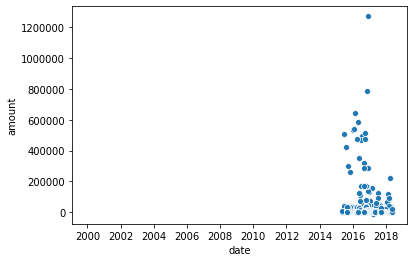

In [24]:
sns.scatterplot(x = "date", y = "amount", data = df)

[(735234.0, 737424.0)]

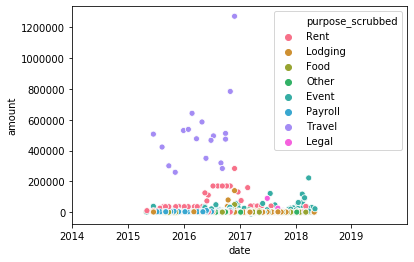

In [28]:
sns.set_palette("husl")
g = sns.scatterplot(x = "date", y = "amount", data = df, hue = "purpose_scrubbed") 
#seaborn paletter to decide the hue
g.set(xlim = ("2014-1-1", "2019-12-31"))

## Reflection:

- What worked from this training? 
- What can you apply moving forward?
- What's one concept you would like to practice more?

#### For extra fun:
[visualization challenges](http://www.storytellingwithdata.com/blog/2019/3/1/swdchallenge-visualize-this-data)

[seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)